In [2]:
!pip install --upgrade deepforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.0 MB 1.1 MB/s 
     |████████████████████████████████| 20.9 MB 1.3 MB/s 
     |████████████████████████████████| 35.1 MB 226 kB/s 
     |████████████████████████████████| 1.1 MB 61.2 MB/s 
     |████████████████████████████████| 1.0 MB 45.6 MB/s 
     |████████████████████████████████| 800 kB 61.9 MB/s 
     |████████████████████████████████| 16.6 MB 43.7 MB/s 
     |████████████████████████████████| 7.8 MB 55.8 MB/s 
     |████████████████████████████████| 125 kB 58.0 MB/s 
     |████████████████████████████████| 512 kB 59.1 MB/s 


In [3]:

import tensorflow as tf
import numpy 
import pandas as pd
import keras as K
from deepforest import main
from deepforest import get_data
import os
import matplotlib.pyplot as plt
## download the trained retina net model
model = main.deepforest()
model.use_release()


Reading config file: /usr/local/lib/python3.8/dist-packages/deepforest/data/deepforest_config.yml


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth


  0%|          | 0.00/130M [00:00<?, ?B/s]

NEON.pt: 129MB [00:04, 27.0MB/s]                           


Model was downloaded and saved to /usr/local/lib/python3.8/dist-packages/deepforest/data/NEON.pt
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


'/usr/local/lib/python3.8/dist-packages/deepforest/data/OSBS_029.png'

In [4]:
## Accessing a sample data
sample_image = get_data("OSBS_029.png")
sample_image

'/usr/local/lib/python3.8/dist-packages/deepforest/data/OSBS_029.png'

In [5]:
image_path = get_data("OSBS_029.png")
boxes = model.predict_image(path=image_path, return_plot = False)

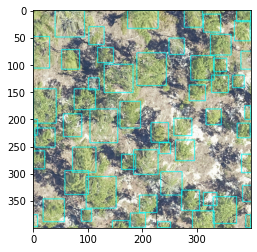

In [13]:
img = model.predict_image(path=get_data("OSBS_029.png"),return_plot=True)
#predict_image returns plot in BlueGreenRed (opencv style), but matplotlib likes RedGreenBlue, switch the channel order.
plt.imshow(img[:,:,::-1])

In [14]:
boxes.head()

,xmin,ymin,xmax,ymax,label,score,image_path
0,330.0,342.0,373.0,391.0,Tree,0.802979,OSBS_029.png
1,216.0,206.0,248.0,242.0,Tree,0.778803,OSBS_029.png
2,325.0,44.0,363.0,82.0,Tree,0.751573,OSBS_029.png
3,261.0,238.0,296.0,276.0,Tree,0.748605,OSBS_029.png
4,173.0,0.0,229.0,33.0,Tree,0.738210,OSBS_029.png


#Predicting Alive VS Dead Trees

In [17]:
m = main.deepforest(num_classes=2,label_dict={"Alive":0,"Dead":1})

Reading config file: /usr/local/lib/python3.8/dist-packages/deepforest/data/deepforest_config.yml


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [19]:

m = main.deepforest(num_classes=2, label_dict={"Alive":0,"Dead":0})
deepforest_release_model = main.deepforest()
deepforest_release_model.use_release()
m.model.backbone.load_state_dict(deepforest_release_model.model.backbone.state_dict())
m.model.head.regression_head.load_state_dict(deepforest_release_model.model.head.regression_head.state_dict())

m.config["train"]["csv_file"] = get_data("testfile_multi.csv") 
m.config["train"]["root_dir"] = os.path.dirname(get_data("testfile_multi.csv"))
m.config["train"]["fast_dev_run"] = True
m.config["batch_size"] = 2
    
m.config["validation"]["csv_file"] = get_data("testfile_multi.csv") 
m.config["validation"]["root_dir"] = os.path.dirname(get_data("testfile_multi.csv"))
m.config["validation"]["val_accuracy_interval"] = 1

m.create_trainer()
m.trainer.fit(m)
assert m.num_classes == 2

Reading config file: /usr/local/lib/python3.8/dist-packages/deepforest/data/deepforest_config.yml
Reading config file: /usr/local/lib/python3.8/dist-packages/deepforest/data/deepforest_config.yml
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.utilities.rank_zero:Running in `fast_dev_run` mode: will run the requested loop using 1 batch(es). Logging and checkpointing is suppressed.
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type      | Params
------------------------------------
0 | model | RetinaNet | 32.2 M
------------------------------------
31.9 M    Trainable params
222 K     Non-trainable params
32.2 M    Total params
128.675   Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/data.py:85: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 3. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=1` reached.


No predictions made


#Further Evaluations

In [20]:
from deepforest import evaluate
from deepforest import main
from deepforest import get_data
from deepforest import visualize
import os
import pandas as pd

m = main.deepforest()
m.use_release()

csv_file = get_data("OSBS_029.csv")
predictions = m.predict_file(csv_file=csv_file, root_dir=os.path.dirname(csv_file))
predictions.head()

Reading config file: /usr/local/lib/python3.8/dist-packages/deepforest/data/deepforest_config.yml
Model from DeepForest release https://github.com/weecology/DeepForest/releases/tag/1.0.0 was already downloaded. Loading model from file.
Loading pre-built model: https://github.com/weecology/DeepForest/releases/tag/1.0.0


,xmin,ymin,xmax,ymax,label,score,image_path
0,330.080566,342.662140,373.715454,391.686005,Tree,0.802979,OSBS_029.tif
1,216.171234,206.591583,248.594879,242.545593,Tree,0.778803,OSBS_029.tif
2,325.359253,44.049038,363.431274,82.248322,Tree,0.751573,OSBS_029.tif
3,261.008606,238.633163,296.410034,276.705475,Tree,0.748605,OSBS_029.tif
4,173.029999,0.000000,229.023438,33.749977,Tree,0.738210,OSBS_029.tif


In [22]:
ground_truth = pd.read_csv(csv_file)
ground_truth.head()

,image_path,xmin,ymin,xmax,ymax,label
0,OSBS_029.tif,203,67,227,90,Tree
1,OSBS_029.tif,256,99,288,140,Tree
2,OSBS_029.tif,166,253,225,304,Tree
3,OSBS_029.tif,365,2,400,27,Tree
4,OSBS_029.tif,312,13,349,47,Tree


In [25]:
result = evaluate.evaluate_image(predictions=predictions, ground_df=ground_truth, root_dir=os.path.dirname(csv_file), savedir=None)     
result.head()

/usr/local/lib/python3.8/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.8/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.8/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.8/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.8/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.8/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersect

,prediction_id,truth_id,IoU,score,xmin,xmax,ymin,ymax,predicted_label,true_label
0,31,0,0.000000,0.523766,203,227,67,90,Tree,Tree
1,41,1,0.000000,0.415022,256,288,99,140,Tree,Tree
2,17,2,0.564232,0.604757,166,225,253,304,Tree,Tree
3,50,3,0.543922,0.350144,365,400,2,27,Tree,Tree
4,34,4,0.616394,0.502465,312,349,13,47,Tree,Tree


In [26]:
result["match"] = result.IoU > 0.4
true_positive = sum(result["match"])
recall = true_positive / result.shape[0]
precision = true_positive / predictions.shape[0]
recall

0.7377049180327869

In [27]:
precision

0.8035714285714286

In [28]:
result = evaluate.evaluate(predictions=predictions, ground_df=ground_truth,root_dir=os.path.dirname(csv_file), savedir=None)     

/usr/local/lib/python3.8/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.8/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.8/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.8/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.8/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/usr/local/lib/python3.8/dist-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersect

In [32]:
result.keys()

dict_keys(['results', 'box_precision', 'box_recall', 'class_recall'])

In [30]:
result["class_recall"]

,label,recall,precision,size
0,Tree,1.0,1.0,56


In [31]:
result["results"].head()

,prediction_id,truth_id,IoU,score,xmin,xmax,ymin,ymax,predicted_label,true_label,image_path,match
0,31,0,0.000000,0.523766,203,227,67,90,Tree,Tree,OSBS_029.tif,False
1,41,1,0.000000,0.415022,256,288,99,140,Tree,Tree,OSBS_029.tif,False
2,17,2,0.564232,0.604757,166,225,253,304,Tree,Tree,OSBS_029.tif,True
3,50,3,0.543922,0.350144,365,400,2,27,Tree,Tree,OSBS_029.tif,True
4,34,4,0.616394,0.502465,312,349,13,47,Tree,Tree,OSBS_029.tif,True
